In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
df = pd.read_csv('spam_clean.csv', encoding='latin_1')
vectoriser = TfidfVectorizer()
df['tVect'] = list(vectoriser.fit_transform(df['Text']).toarray())

tree = DecisionTreeClassifier()
tree.fit(df['tVect'].tolist(), df['Level1'].tolist())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
df

,PostId,Text,Level1,Level,tVect
0,1,"go jurong point , crazy.. available bugis n gr...",ham,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,ok lar ... joking wif u oni ...,ham,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,free entry 2 wkly comp win fa cup final tkts 2...,spam,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,u dun say early hor ... u c already say ...,ham,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,"nah n't think goes usf , lives around though",ham,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,6,=- rcv,spam,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,7,even brother like speak . treat like aids pate...,ham,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,8,per request 'melle melle ( oru minnaminunginte...,ham,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,9,winner ! ! valued network customer selected re...,spam,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,10,mobile 11 months ? u r entitled update latest ...,spam,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
X=df.tVect.apply(list).apply(pd.Series).astype(int)

In [5]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

C:\Users\Aashish Raj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aashish Raj\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
sklearn_pca_x = pca.fit_transform(x_std)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

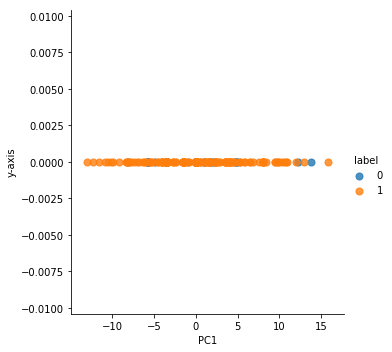

In [8]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1','PC2','PC3'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = df.Level

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [9]:
sklearn_result

,PC1,PC2,PC3,y-axis,label
0,0.000625,0.000142,0.000073,0.0,1
1,0.000625,0.000142,0.000073,0.0,1
2,0.000625,0.000142,0.000073,0.0,0
3,0.000625,0.000142,0.000073,0.0,1
4,0.000625,0.000142,0.000073,0.0,1
5,-8.109494,10.232216,10.387475,0.0,0
6,0.000625,0.000142,0.000073,0.0,1
7,0.000625,0.000142,0.000073,0.0,1
8,0.000625,0.000142,0.000073,0.0,0
9,0.000625,0.000142,0.000073,0.0,0
